<a href="https://colab.research.google.com/github/mharunturkmenoglu/GlobalAIHubSummerCamp22/blob/main/ML_5_6_7_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [18]:
df = pd.read_csv ('insurance.csv')


In [20]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [21]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [22]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


##Keşifsel Veri Analizi Yapılması
Veriyi inceleyerek, analiz ederek veriden anlamlı sonuçlar çıkarınız.

● Bmi(Vücut Kitle İndeksi)’nin dağılımını inceleyiniz

● “smoker” ile “charges” arasındaki ilişkiyi inceleyiniz

○ “smoker” (Sigara tüketen) ile “region”(Bölge) arasındaki ilişkiyi inceleyiniz.

○ “bmi” ile “sex”(Cinsiyet) arasındaki ilişkiyi inceleyiniz.

○ En çok “children”’a sahip “region”’ı bulunuz.

○ “Age” ile “bmi” arasındaki ilişkiyi inceleyiniz.

○ “bmi” ile “children” arasındaki ilişkiyi inceleyiniz.

○ “bmi” değişkeninde outlier var mıdır? İnceleyiniz.

○ “bmi” ile “charges” arasındaki ilişkiyi inceleyiniz.

○ “region”, “smoker” ve “bmi” arasındaki ilişkiyi bar plot kullanarak inceleyiniz.

İncelenecek olan parametreler yukarıdaki gibidir.

##En çok “children”’a sahip “region”

In [23]:
northwest_c = df[df.region == "northwest"].children.count()
northeast_c = df[df.region == "northeast"].children.count()
southwest_c = df[df.region == "southwest"].children.count()
southheast_c = df[df.region == "southeast"].children.count()

print(northwest_c, northeast_c, southwest_c, southheast_c)

#En çok “children”’a sahip “region”: Southeast

325 324 325 364


Text(0.5, 1.0, 'Children by Region')

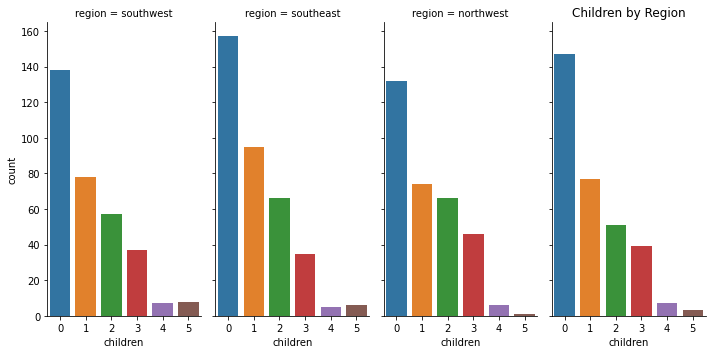

In [24]:
sns.catplot(x = 'children', col = 'region', data = df, kind = 'count', aspect = 0.5)
plt.title('Children by Region')


En fazla çocuğa sahip bölge: Southeast'tir. Grafikleri inceledğimizde şöyle bir sıralama yapabiliriz, bölgelere göre çocuk sayısının en çoktan en aza doğru:
Southeast > Northwest > Southwest > Northeast şeklindedir.

##“Age” ile “bmi” arasındaki ilişki

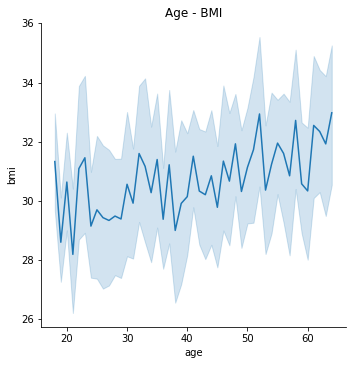

In [25]:
sns.relplot(x = df.age, y = df.bmi, data = df, kind='line') 
plt.title('Age - BMI')
plt.show()

In [27]:
# Yaşlara göre kategoriler:

df.loc[(df['age'] >= 18) & (df['age'] < 36), 'age_category'] = 'youth'
df.loc[(df['age'] >= 36) & (df['age'] <= 55), 'age_category'] = 'adults'
df.loc[df['age'] > 55, 'age_category'] = 'seniors'
df['age_category'].value_counts()

youth      574
adults     548
seniors    216
Name: age_category, dtype: int64

In [28]:
sns.catplot(x = 'age_category', col = 'weight_condition', data = df, kind = 'count', aspect = 0.8)

KeyError: ignored

In [29]:
#Gençlerin kilo durumu
youth_underweight = df[df.age_category == "youth"][df.weight_condition == "underweight"].weight_condition.count()
youth_normal = df[df.age_category == "youth"][df.weight_condition == "normal"].weight_condition.count()
youth_overweight = df[df.age_category == "youth"][df.weight_condition == "overweight"].weight_condition.count()
youth_obese = df[df.age_category == "youth"][df.weight_condition == "obese"].weight_condition.count()

#Yetişkinlerin kilo durumu
adults_underweight = df[df.age_category == "adults"][df.weight_condition == "underweight"].weight_condition.count()
adults_normal = df[df.age_category == "adults"][df.weight_condition == "normal"].weight_condition.count()
adults_overweight = df[df.age_category == "adults"][df.weight_condition == "overweight"].weight_condition.count()
adults_obese = df[df.age_category == "adults"][df.weight_condition == "obese"].weight_condition.count()

#Yaşlıların kilo durumu
seniors_underweight = df[df.age_category == "seniors"][df.weight_condition == "underweight"].weight_condition.count()
seniors_normal = df[df.age_category == "seniors"][df.weight_condition == "normal"].weight_condition.count()
seniors_overweight = df[df.age_category == "seniors"][df.weight_condition == "overweight"].weight_condition.count()
seniors_obese = df[df.age_category == "seniors"][df.weight_condition == "obese"].weight_condition.count()


print(youth_underweight, youth_normal, youth_overweight, youth_obese)
print(adults_underweight, adults_normal, adults_overweight, adults_obese)
print(seniors_underweight, seniors_normal, seniors_overweight,seniors_obese)

AttributeError: ignored

In [30]:
age_weight=pd.DataFrame([[14, 112, 328, 120], 
                         [5, 88, 326, 129],
                         [2, 26, 121, 67]], columns=['underwight', 'normal', 'overweight', 'obese'], index = ['youth', 'adults', 'seniors'])

age_weight

,underwight,normal,overweight,obese
youth,14,112,328,120
adults,5,88,326,129
seniors,2,26,121,67



Kilolu olanların çoğunluğu genç ve yetişkinler yani 55 yaşından küçük olanlar oluşturuyor diyebiliriz. Zayıf ve normal kiloda olanların çoğunu ise 36 yaşından küçükler oluşturmaktadır. Obez yaşlı sayısı diğerlerine göre daha azdır yorumlarını yapabiliriz.





##“bmi” ile “children” arasındaki ilişki

In [31]:
df.children.describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

Text(0.5, 1.0, 'Children - BMI')

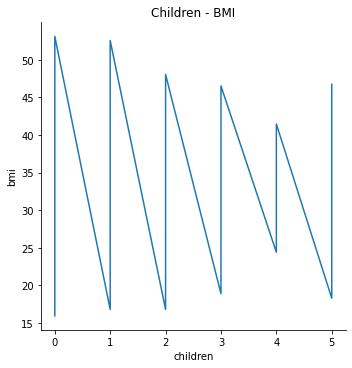

In [32]:
sns.relplot(x="children", y="bmi", kind="line", estimator=None, data=df)
plt.title('Children - BMI')

Text(0.5, 1.0, 'Correlation Between BMI and Children')

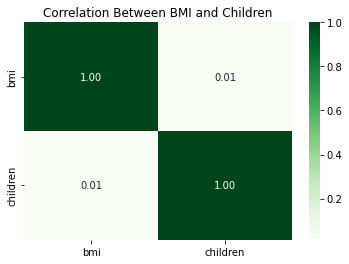

In [33]:
correlation = df[['bmi', 'children']].corr()
sns.heatmap(correlation, annot = True, fmt = '.2f', cmap = 'Greens')
plt.title('Correlation Between BMI and Children')

In [35]:
sns.swarmplot(x='weight_condition', y='children', data=df)

ValueError: ignored

In [36]:
#Sağlık sigortası kapsamındaki çocuk sayısı / Bakmakla yükümlü olunan kişi sayısı

df.loc[df['children'] > 0, 'covered'] = 'yes'
df.loc[df['children'] == 0, 'covered'] = 'no'
df['covered'].value_counts()

yes    764
no     574
Name: covered, dtype: int64

In [37]:
covered = df['covered']

In [38]:
sns.catplot(x = 'covered', col = 'weight_condition', data = df, kind = 'count', aspect = 0.8)
plt.title('Number of children covered by health insurance- Weight Condition')

KeyError: ignored

In [39]:
# Sağlık sigortası kapsamındaki çocuk sayısı / Bakmakla yükümlü olunan kişi sayısı

df.loc[df['children'] > 0, 'covered'] = 'yes'
df.loc[df['children'] == 0, 'covered'] = 'no'
df['covered'].value_counts()

yes    764
no     574
Name: covered, dtype: int64

In [40]:
covered = df['covered']

In [41]:
sns.catplot(x = 'covered', col = 'weight_condition', data = df, kind = 'count', aspect = 0.8)
plt.title('Number of children covered by health insurance- Weight Condition')

KeyError: ignored

SONUC yazamadım.

## “bmi” değişkeninde outlier var mıdır? İnceleyiniz.

In [42]:
bmi_i=df.bmi
outliers=[]
def detect_outlier(bmi_i):
    
    threshold=3
    mean_1 = np.mean(bmi_i)
    std_1 =np.std(bmi_i)
    
    
    for y in bmi_i:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [43]:
outlier_datapoints = detect_outlier(bmi_i)
print(outlier_datapoints)

[49.06, 50.38, 52.58, 53.13]


In [44]:
print(np.where(df['bmi']>49))

(array([ 116,  847, 1047, 1317]),)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


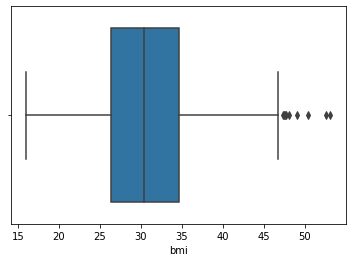

In [45]:
sns.boxplot(df['bmi'])

"BMI" değişkeni incelendiğinde yukarıdaki grafiğe gör;, 49'un üzerindeki değerlerin aykırı değerler olarak hareket ettiğini açıkça görebiliriz.
49 üzeri outlier (aykırı değerleri) var. Aykırı Değer Endeksi: 116, 847, 1047 ve 1317 indexteki outlier'dir.